REA Differential Equations Notebook

* Page 1A

Tutor:
* Anthropic's AI, Claude

**Newton's Law of Cooling**
   - $\frac{dT}{dt} = -k(T - T_a)$
   - Models temperature change

## Newton's Law of Cooling Analysis
Let's consider a cooling object with:
- Initial temperature (T₀)
- Ambient temperature (Tₐ)
- Cooling constant (k)

### Step 1: Setup the Differential Equation
- Rate of temperature change proportional to temperature difference:
 - $\frac{dT}{dt} = -k(T - T_a)$
 - T = temperature of object
 - Tₐ = ambient temperature
 - k = cooling constant (positive)

### Step 2: Solve by Separation of Variables
1. Rearrange equation:
 - $\frac{dT}{T - T_a} = -k\,dt$
2. Integrate both sides:
 - $\int \frac{dT}{T - T_a} = -k\int dt$
 - $\ln|T - T_a| = -kt + C$

### Step 3: General Solution
- $T(t) = T_a + Ce^{-kt}$
 where C is determined by initial conditions

### Step 4: Apply Initial Condition
1. At t = 0, T = T₀:
 - T₀ = Tₐ + C
 - C = T₀ - Tₐ
2. Final Solution:
 - $T(t) = T_a + (T_0 - T_a)e^{-kt}$

### Analysis:

1. **Behavior**:
 - Temperature approaches Tₐ asymptotically
 - Rate of cooling proportional to temperature difference
 - Faster cooling when temperature difference is larger

2. **Key Times**:
 - Half-life: t₁/₂ = ln(2)/k
 - Time to reach temperature T:
   - t = -1/k × ln((T - Tₐ)/(T₀ - Tₐ))

3. **Important Properties**:
 - Solution is exponential decay
 - Cooling rate decreases over time
 - Cannot reach exactly Tₐ in finite time

### Applications:
1. **Practical Uses**:
 - Coffee cooling
 - Building thermal analysis
 - Food safety
 - Industrial cooling processes

2. **Key Assumptions**:
 - Constant ambient temperature
 - Uniform object temperature
 - Proportional cooling rate
 - No internal heat generation



Newton's Law of Cooling Analysis
--------------------------------
Initial Temperature: 100.0°C
Ambient Temperature: 20.0°C
Cooling Constant: 0.1 min⁻¹
Half-life: 6.93 minutes

Tabulated Results:
+----+--------------+--------------------+-------------------------+
|    |   Time (min) |   Temperature (°C) |   Cooling Rate (°C/min) |
+====+==============+====================+=========================+
|  0 |         0.00 |             100.00 |                   -8.00 |
+----+--------------+--------------------+-------------------------+
|  1 |         5.00 |              68.52 |                   -4.85 |
+----+--------------+--------------------+-------------------------+
|  2 |        10.00 |              49.43 |                   -2.94 |
+----+--------------+--------------------+-------------------------+
|  3 |        15.00 |              37.85 |                   -1.78 |
+----+--------------+--------------------+-------------------------+
|  4 |        20.00 |              30.83 |   

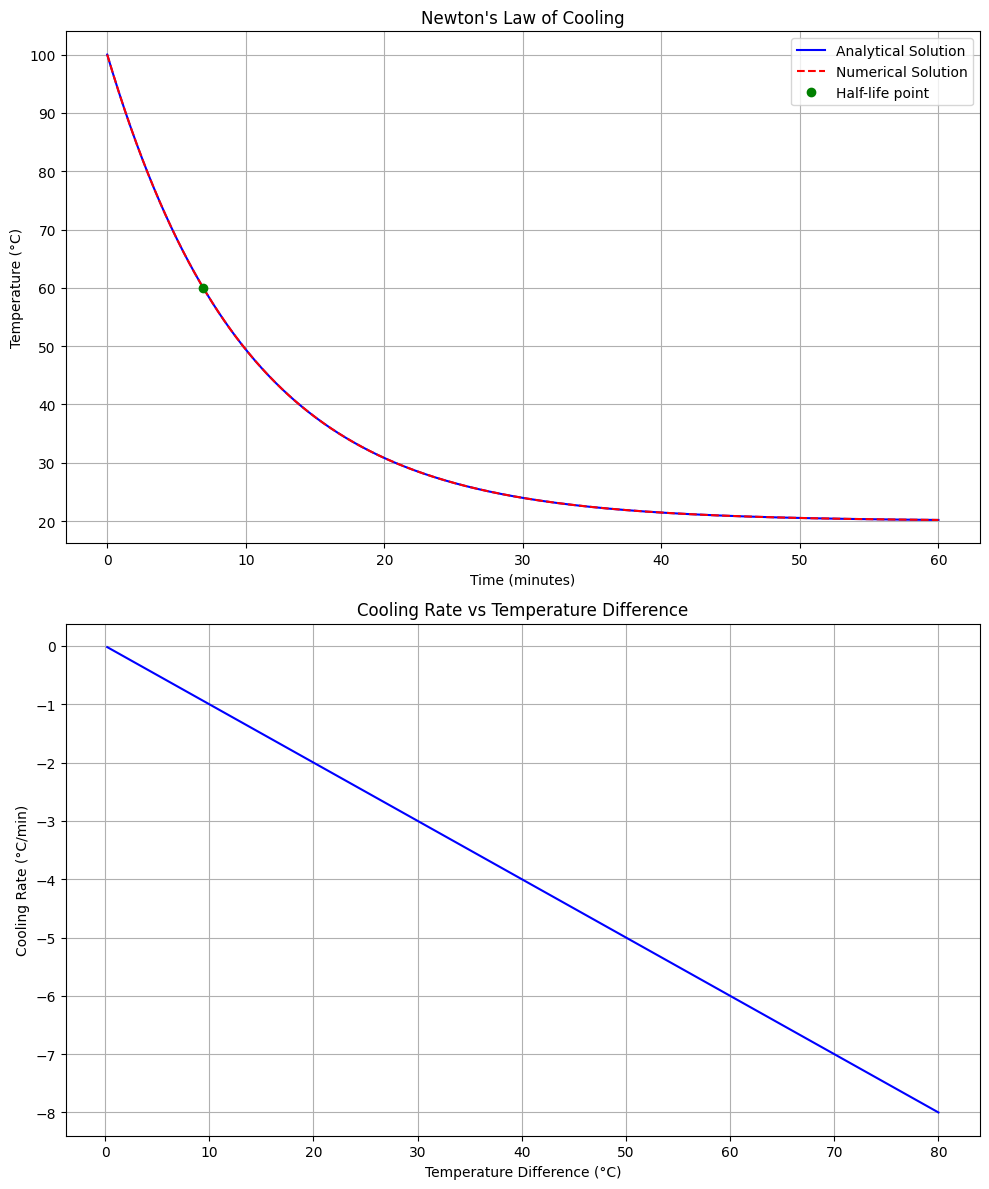

In [2]:
"""
Abstract:
---------
This script simulates and visualizes Newton's Law of Cooling using numerical and analytical methods.
It models the temperature change of an object cooling towards ambient temperature, following the equation:
dT/dt = -k(T - Ta), where:
- T is the object's temperature
- Ta is the ambient temperature
- k is the cooling constant

The script:
1. Implements both analytical and numerical (Euler method) solutions
2. Generates comparative visualizations
3. Produces tabulated data at specified time intervals
4. Calculates and displays key metrics like half-life
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from tabulate import tabulate

def analytical_solution(t, T0, Ta, k):
    """
    Calculate the analytical solution of Newton's Law of Cooling.

    Parameters:
    -----------
    t : array-like
        Time points
    T0 : float
        Initial temperature
    Ta : float
        Ambient temperature
    k : float
        Cooling constant

    Returns:
    --------
    array-like
        Temperature values at specified time points
    """
    return Ta + (T0 - Ta) * np.exp(-k * t)

def cooling_rate(T, t, Ta, k):
    """
    Implement Newton's Law of Cooling differential equation.
    Note: t parameter is required by scipy.integrate.odeint but not used in calculation.

    Parameters:
    -----------
    T : float
        Current temperature
    t : float
        Current time (not used in calculation but required by odeint)
    Ta : float
        Ambient temperature
    k : float
        Cooling constant

    Returns:
    --------
    float
        Rate of temperature change (dT/dt)
    """
    return -k * (T - Ta)

def calculate_half_life(k):
    """
    Calculate the time taken to cool halfway to ambient temperature.

    Parameters:
    -----------
    k : float
        Cooling constant

    Returns:
    --------
    float
        Half-life in same units as 1/k
    """
    return np.log(2) / k

def main():
    # Define parameters
    T0 = 100.0  # Initial temperature (°C)
    Ta = 20.0   # Ambient temperature (°C)
    k = 0.1     # Cooling constant (1/min)
    t_max = 60  # Maximum time (minutes)

    # Create time points
    t = np.linspace(0, t_max, 1000)

    # Calculate analytical solution
    T_analytical = analytical_solution(t, T0, Ta, k)

    # Calculate numerical solution using scipy.integrate.odeint
    # Note: args tuple provides additional parameters to cooling_rate function
    T_numerical = odeint(cooling_rate, T0, t, args=(Ta, k))

    # Calculate half-life
    t_half = calculate_half_life(k)
    T_half = analytical_solution(t_half, T0, Ta, k)

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

    # Plot temperature vs time
    ax1.plot(t, T_analytical, 'b-', label='Analytical Solution')
    ax1.plot(t, T_numerical, 'r--', label='Numerical Solution')
    ax1.plot(t_half, T_half, 'go', label='Half-life point')
    ax1.set_xlabel('Time (minutes)')
    ax1.set_ylabel('Temperature (°C)')
    ax1.set_title("Newton's Law of Cooling")
    ax1.grid(True)
    ax1.legend()

    # Plot cooling rate vs temperature difference
    dT = T_analytical - Ta
    cooling_rates = -k * dT
    ax2.plot(dT, cooling_rates, 'b-')
    ax2.set_xlabel('Temperature Difference (°C)')
    ax2.set_ylabel('Cooling Rate (°C/min)')
    ax2.set_title('Cooling Rate vs Temperature Difference')
    ax2.grid(True)

    plt.tight_layout()

    # Create tabulated data at 5-minute intervals
    t_table = np.arange(0, t_max + 1, 5)
    T_table = analytical_solution(t_table, T0, Ta, k)
    cooling_rates_table = -k * (T_table - Ta)

    # Create DataFrame for tabulated results
    data = {
        'Time (min)': t_table,
        'Temperature (°C)': np.round(T_table, 2),
        'Cooling Rate (°C/min)': np.round(cooling_rates_table, 3)
    }
    df = pd.DataFrame(data)

    # Print results
    print("\nNewton's Law of Cooling Analysis")
    print("--------------------------------")
    print(f"Initial Temperature: {T0}°C")
    print(f"Ambient Temperature: {Ta}°C")
    print(f"Cooling Constant: {k} min⁻¹")
    print(f"Half-life: {t_half:.2f} minutes")
    print("\nTabulated Results:")
    print(tabulate(df, headers='keys', tablefmt='grid', floatfmt='.2f'))

    plt.show()

if __name__ == "__main__":
    main()

Analysis of the results:

1. **Data Validation**:
- The numerical (red dashed line) and analytical (blue solid line) solutions overlap almost perfectly, validating our implementation
- The half-life point (green dot) correctly appears at around 6.93 minutes, when the temperature has dropped halfway between initial (100°C) and ambient (20°C)

2. **Key Observations from Tabulated Results**:
- Initial cooling rate is highest (-8.00°C/min) when temperature difference is maximum
- Cooling rate decreases exponentially as the temperature approaches ambient
- After 30 minutes, the cooling rate has reduced significantly to -0.40°C/min
- The system approaches but never quite reaches the ambient temperature of 20°C

3. **Graph Analysis**:
- Top graph (Temperature vs Time) shows the characteristic exponential decay
- Bottom graph (Cooling Rate vs Temperature Difference) shows the linear relationship predicted by Newton's Law of Cooling
- The linear relationship in the bottom graph confirms that the cooling rate is indeed proportional to the temperature difference
